In [1]:
# Self Organizing Maps

# Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset.head(10)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [3]:
dataset.columns

Index(['CustomerID', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14', 'Class'],
      dtype='object')

In [4]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [6]:
# Training the SOM
from minisom import MiniSom

In [7]:
som = MiniSom(x=10,y=10,input_len=15)

In [8]:
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
CustomerID    690 non-null int64
A1            690 non-null int64
A2            690 non-null float64
A3            690 non-null float64
A4            690 non-null int64
A5            690 non-null int64
A6            690 non-null int64
A7            690 non-null float64
A8            690 non-null int64
A9            690 non-null int64
A10           690 non-null int64
A11           690 non-null int64
A12           690 non-null int64
A13           690 non-null int64
A14           690 non-null int64
Class         690 non-null int64
dtypes: float64(3), int64(13)
memory usage: 86.3 KB


In [10]:
# visualizing the results 
from pylab import bone, colorbar, pcolor, plot, show

In [14]:
bone()
pcolor(som.distance_map().T)
colorbar()

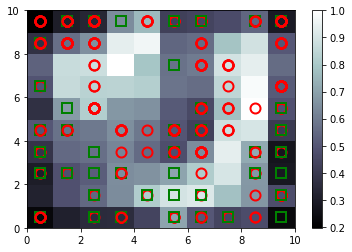

In [17]:
markers = ['o', 's']
colors = ['r', 'g']
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
         markers[y[i]], 
         markeredgecolor=colors[y[i]], 
         markerfacecolor='None', 
         markersize=10, 
         markeredgewidth=2)
show()

In [18]:
# Find frauds
mappings = som.win_map(X)
mappings

defaultdict(list,
            {(0,
              0): [array([  4.60214873e-01,   1.00000000e+00,   1.16541353e-01,
                       4.10714286e-01,   5.00000000e-01,   1.53846154e-01,
                       3.75000000e-01,   1.75438596e-02,   1.00000000e+00,
                       0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
                       5.00000000e-01,   5.00000000e-02,   6.80000000e-04]), array([ 0.4129116 ,  1.        ,  0.37473684,  0.0075    ,  0.5       ,
                      0.23076923,  0.375     ,  0.00298246,  1.        ,  0.        ,
                      0.        ,  1.        ,  0.5       ,  0.14      ,  0.        ]), array([ 0.58929079,  1.        ,  0.31699248,  0.14285714,  0.5       ,
                      0.07692308,  0.5       ,  0.43859649,  1.        ,  0.        ,
                      0.        ,  1.        ,  0.5       ,  0.092     ,  0.        ]), array([ 0.50228848,  1.        ,  0.4724812 ,  0.05357143,  0.5       ,
                   

In [19]:
frauds = mappings[(8,1)]

In [20]:
frauds

[array([ 0.46781111,  1.        ,  0.73308271,  0.45535714,  0.        ,
         0.53846154,  0.875     ,  0.1754386 ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.5       ,  0.056     ,  0.        ])]